# Mini-Project

This mini-project is kinda-sorta similar to your current project. We will be calculating the correlation between two sets of datapoints. The correlation coefficient has some superficial similarities to the linear regression line that you learned to calculate in chapter 4. The difference is that this data came from the internet rather than being hardcoded.

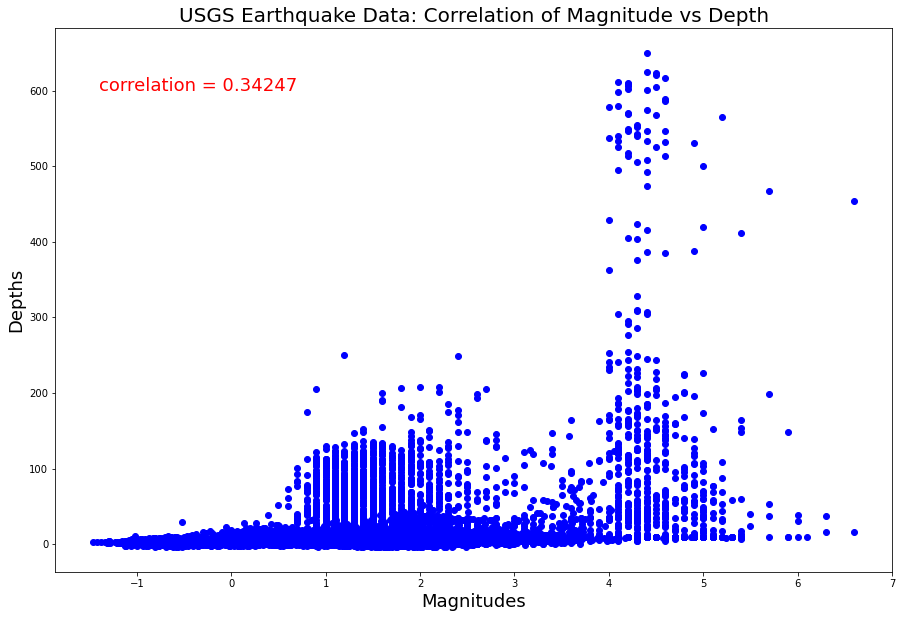

## Review from Last Lecture

* Read CSV File
* Find a column
* Extract column data from every row
* Graph column data

In [1]:
import csv

In [2]:
def get_csv_columns(csv_file):
    with open(csv_file, "r") as csvObject:
        csv_reader = csv.reader(csvObject)
        titles = next(csv_reader)   
        return titles

In [3]:
def find_csv_column(csv_file, column_name):
    with open(csv_file, "r") as csv_object:
        csv_reader = csv.reader(csv_object)
        titles = next(csv_reader)
    col_num = 0
    while titles[col_num] != column_name:
        col_num += 1
    return col_num

In [4]:
def get_csv_column(csv_file, column_name):

    if column_name not in get_csv_columns(csv_file):
        return None
    
    dataset = []
    col_num = find_csv_column(csv_file, column_name)
    with open(csv_file, "r") as csv_object:
        csv_reader = csv.reader(csv_object)
        titles = next(csv_reader)
        
        # Most C-like of all code
        line = next(csv_reader, "")      # "priming statement" 
        while line != "":
            dataset.append(line[col_num])
            line = next(csv_reader, "")  # "loop update statement"            

        # Little more pythonic
        #for i, line in enumerate(csvReader):
        #    dataset.append(line[columnNum])        
        
    return dataset

magnitudes = get_csv_column("earthquakes.csv", "mag")
print(len(magnitudes))
magnitudes[:10]

15524


['0.75', '2.52', '0.56', '1.7', '1.37', '1.3', '1.73', '3.17', '1.18', '1.95']

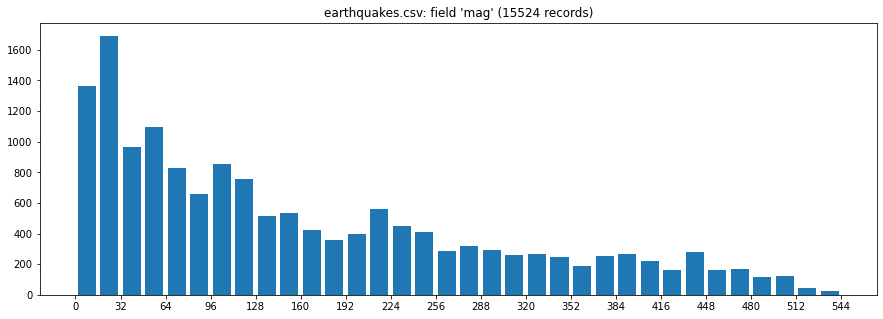

In [5]:
import matplotlib.pyplot as plt

def csv_histogram(csv_file, column_name):
    
    data = get_csv_column(csv_file, column_name)
    plt.figure(figsize=(15,5))
    n, bins, patches = plt.hist(data, bins="auto", rwidth=0.8)
    ticks = list(map(int, bins[::2]))
    plt.xticks(ticks, ticks)
    plt.title("{0}: field '{1}' ({2} records)".format(csv_file, column_name, len(data)))
    plt.show()
    
csv_histogram("earthquakes.csv", "mag")

## List Comprehension

In [6]:
# Not list comprehension
cubes = []
for x in range(1, 11):
    cubes.append(x ** 3)
cubes

[1, 8, 27, 64, 125, 216, 343, 512, 729, 1000]

In [7]:
cubes = [x ** 3 for x in range(1, 11)]
cubes

[1, 8, 27, 64, 125, 216, 343, 512, 729, 1000]

In [8]:
evenSquares = [x ** 2 for x in range(1, 25) if x % 2 == 0]
evenSquares

[4, 16, 36, 64, 100, 144, 196, 256, 324, 400, 484, 576]

### Exercises

Solve the following problems by writing a function that returns a python list comprehension

- Create a list of the first `n` items in the fibonacci sequence
- Create a list of all numbers between 1 and 100 that are multiples of 5
- Create a list of all leap years between a start and ending year; remember that century years (100, 200, 300, ...) do not have a leap year unless they are a multiple of 400

In [9]:
fibb = [x]

## Back to CSV File

This time armed with List Comprehension

In [10]:
def get_csv_column(csv_file, column_name):

    if column_name not in get_csv_columns(csv_file):
        return None
    
    dataset = []
    col_num = find_csv_column(csv_file, column_name)
    with open(csv_file, "r") as csv_object:
        csv_reader = csv.reader(csv_object)
        titles = next(csv_reader)
        
        # Most C-like of all code
        #line = next(csv_reader, "")      # "priming statement" 
        #while line != "":
        #    dataset.append(line[col_num])
        #    line = next(csv_reader, "")  # "loop update statement"            

        # Little more pythonic
        #for i, line in enumerate(csvReader):
        #    dataset.append(line[columnNum])
        
        # Fully pythonic
        
        dataset = [float(line[col_num]) for line in csv_reader if is_float(line[col_num])]
        
    return dataset

magnitudes = get_csv_column("earthquakes.csv", "mag")
print(len(magnitudes))
magnitudes[:10]

NameError: name 'is_float' is not defined

In [11]:
import statistics
print("max", max(magnitudes))
print("min", min(magnitudes))
print("mean", statistics.mean(magnitudes))      # this will fail because data holds strings, not numbers
print("median", statistics.median(magnitudes))  # this will fail because data holds strings, not numbers

max 6.6
min 


TypeError: can't convert type 'str' to numerator/denominator

#### Don't run any further until we fix the errors with our magnitude data

But why did we need all of that complex logic `if isFloat(row[columnNum])` in the list comprehension? Well, sometimes there are rows in our dataset that do not include the magnitude of the earthquake. The scientific equipment detected that a quake occured but for some reason they weren't able to record an accurate measurement. When this happens, the data includes an empty string `""` in the magnitude field. Calling `float()` on an empty string throws a `ValueError` exception. To avoid these exceptions, we first check to make sure that the `row[columnNum]` data is a `float`. How did I know this? Because the first time I wrote this function, I didn't include it, and the code kept crashing with a `ValueError` exception.

In [12]:
def is_float(float_string):
    try:
        float_num = float(float_string)
        return True
    except:
        return False
    
is_float("abcd")

False

### JavaScript Object Notation

JSON is an awesome data format. They are usually larger than CSV because each entry contains the full header information (in CSV files, there was one header for the entire files). But JSON is much more powerful than CSV. Not only does it describe each piece of data, but it also allows you to include lists and dictionaries very easily. If you didn't grab earthquake data in the JSON format from USGS, go grab it now: https://www.usgs.gov/

The first entry in JSON files might be a summary. You'll have to examine the file to know for sure. In this case, we have a single summary field followed by a list of all the earthquakes. It looks something like this:

```
{"type":"FeatureCollection", "metadata": {... "count":15522}},
 "features':[
    {"type":"Feature","Properties":{"mag":5.1,"place":"72 km SE of Kira-kira, Solomon Islands","time":...},
    {"type":"Feature","Properties":{"mag":4.6,"place":"162 km SW of Ndoi Island, Fiji","time":...},
    {"type":"Feature","Properties":{"mag":2.1,"place":"44 km ENE of Prome, Burma","time":...}, ...]
}
```

The `[]` represent lists and the `{}` are dictionaries.

In [13]:
jsonData = '[{"name":"Joshua", "age":40, "favoriteFood":"BBQ"}, \
             {"name":"LeeAnn", "age":40, "favoriteFood":"Avocado Toast"}, \
             {"name":"Hannah", "age":40, "favoriteFood":"Cheese & Spinach Noodles"}, \
             {"name":"Elizabeth", "age":40, "favoriteFood":"Macaron & Cheese"}, \
             {"name":"Lydia", "age":40, "favoriteFood":"Pizza"}]'
jsonData

'[{"name":"Joshua", "age":40, "favoriteFood":"BBQ"},              {"name":"LeeAnn", "age":40, "favoriteFood":"Avocado Toast"},              {"name":"Hannah", "age":40, "favoriteFood":"Cheese & Spinach Noodles"},              {"name":"Elizabeth", "age":40, "favoriteFood":"Macaron & Cheese"},              {"name":"Lydia", "age":40, "favoriteFood":"Pizza"}]'

In [14]:
import json
json.loads(jsonData)

[{'name': 'Joshua', 'age': 40, 'favoriteFood': 'BBQ'},
 {'name': 'LeeAnn', 'age': 40, 'favoriteFood': 'Avocado Toast'},
 {'name': 'Hannah', 'age': 40, 'favoriteFood': 'Cheese & Spinach Noodles'},
 {'name': 'Elizabeth', 'age': 40, 'favoriteFood': 'Macaron & Cheese'},
 {'name': 'Lydia', 'age': 40, 'favoriteFood': 'Pizza'}]

## Loading JSON Files

We could have a file containing JSON data and then use `json.load()` to read directly from the file into a JSON structure. This would be similar to what we did we CSV files. But why not get the JSON data directly from the internet? We can use `urllib` to read the data.

In [15]:
import urllib.request
handle = urllib.request.urlopen("https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_month.geojson")
rawdata = handle.read()
rawdata[:400]

b'{"type":"FeatureCollection","metadata":{"generated":1604885998000,"url":"https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_month.geojson","title":"USGS Magnitude 4.5+ Earthquakes, Past Month","status":200,"api":"1.10.3","count":490},"features":[{"type":"Feature","properties":{"mag":4.5,"place":"16 km S of Nabire, Indonesia","time":1604853448436,"updated":1604857348040,"tz":null,"url":"'

In [16]:
data = json.loads(rawdata)
data.keys()

dict_keys(['type', 'metadata', 'features', 'bbox'])

In [17]:
data['type']

'FeatureCollection'

In [18]:
data['metadata']

{'generated': 1604885998000,
 'url': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_month.geojson',
 'title': 'USGS Magnitude 4.5+ Earthquakes, Past Month',
 'status': 200,
 'api': '1.10.3',
 'count': 490}

In [19]:
data['bbox']

[-179.9572, -63.5089, 1.43, 179.8214, 79.1585, 596.63]

In [20]:
earthquakes = data.get('features', [])
print("Downloaded JSON data for", len(earthquakes), " earthquakes")
print("Sample data:")
earthquakes[0]

Downloaded JSON data for 490  earthquakes
Sample data:


{'type': 'Feature',
 'properties': {'mag': 4.5,
  'place': '16 km S of Nabire, Indonesia',
  'time': 1604853448436,
  'updated': 1604857348040,
  'tz': None,
  'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us7000cc5n',
  'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us7000cc5n.geojson',
  'felt': None,
  'cdi': None,
  'mmi': None,
  'alert': None,
  'status': 'reviewed',
  'tsunami': 0,
  'sig': 312,
  'net': 'us',
  'code': '7000cc5n',
  'ids': ',us7000cc5n,',
  'sources': ',us,',
  'types': ',origin,phase-data,',
  'nst': None,
  'dmin': 3.283,
  'rms': 0.64,
  'gap': 115,
  'magType': 'mb',
  'type': 'earthquake',
  'title': 'M 4.5 - 16 km S of Nabire, Indonesia'},
 'geometry': {'type': 'Point', 'coordinates': [135.4845, -3.5093, 37.84]},
 'id': 'us7000cc5n'}

In [21]:
def get_earthquake_field(earthquake_json,specific):
    output = []
    for row in earthquake_json.get('features', []):
        properties = row.get('properties',  {})
        data = properties.get(specific, None)
        if data != None:
            output.append(data)
    return output

mags = get_earthquake_field(data,"place")
mags[:10]

['16 km S of Nabire, Indonesia',
 '50 km SSW of Tungor, Russia',
 '36 km ESE of Khorugh, Tajikistan',
 'Prince Edward Islands region',
 '47 km NE of Moyobamba, Peru',
 'central Mid-Atlantic Ridge',
 '92 km SW of Iquique, Chile',
 '92 km WSW of Copiapó, Chile',
 'Izu Islands, Japan region',
 '33 km SSW of La Gomera, Guatemala']

### Exercises

Complete the exercises on page 173:

- 5.14
- 5.15

By the way, we could have loaded CSV data directly from the internet too. We just need to know the URL; in this case, it would be: https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv.

If you need more help loading CSV from the internet, see [this article](https://stackoverflow.com/questions/16283799/how-to-read-a-csv-file-from-a-url-with-python) on StackOverflow.

In [22]:
def get_earthquake_magnitude(earthquake_json):
    output = []
    for row in earthquake_json.get('features', []):
        properties = row.get('properties',  {})
        data = properties.get('mag', None)
        if data != None:
            output.append(data)
    return output

mags = get_earthquake_magnitude(data)
mags[:10]

[4.5, 4.6, 4.6, 4.7, 4.7, 5.1, 4.6, 4.7, 4.6, 4.5]

## 5.4 Correlating Data

Starting on page 173

Correlation is a statistical measurement that tells us the tendency of two different variables to go up or down at the same time. It's fairly easy to see correlation when two variables are graphed side-by-side. But we can also measure correlation and assign it a value, this is called the Pearson correlation coefficient and is denoted with $r$. An $r$ value of `1.0` means that two variables are strongly correlated (1.0 is the maximum value). A value of `0.0` means that the two variables are not at all correlated. If the $r$ value is positive, it means that the two variables move in the same direction. If the $r$ value is negative, it means that they move in opposite directions (one increases while the other decreases). You can see it in this picture:

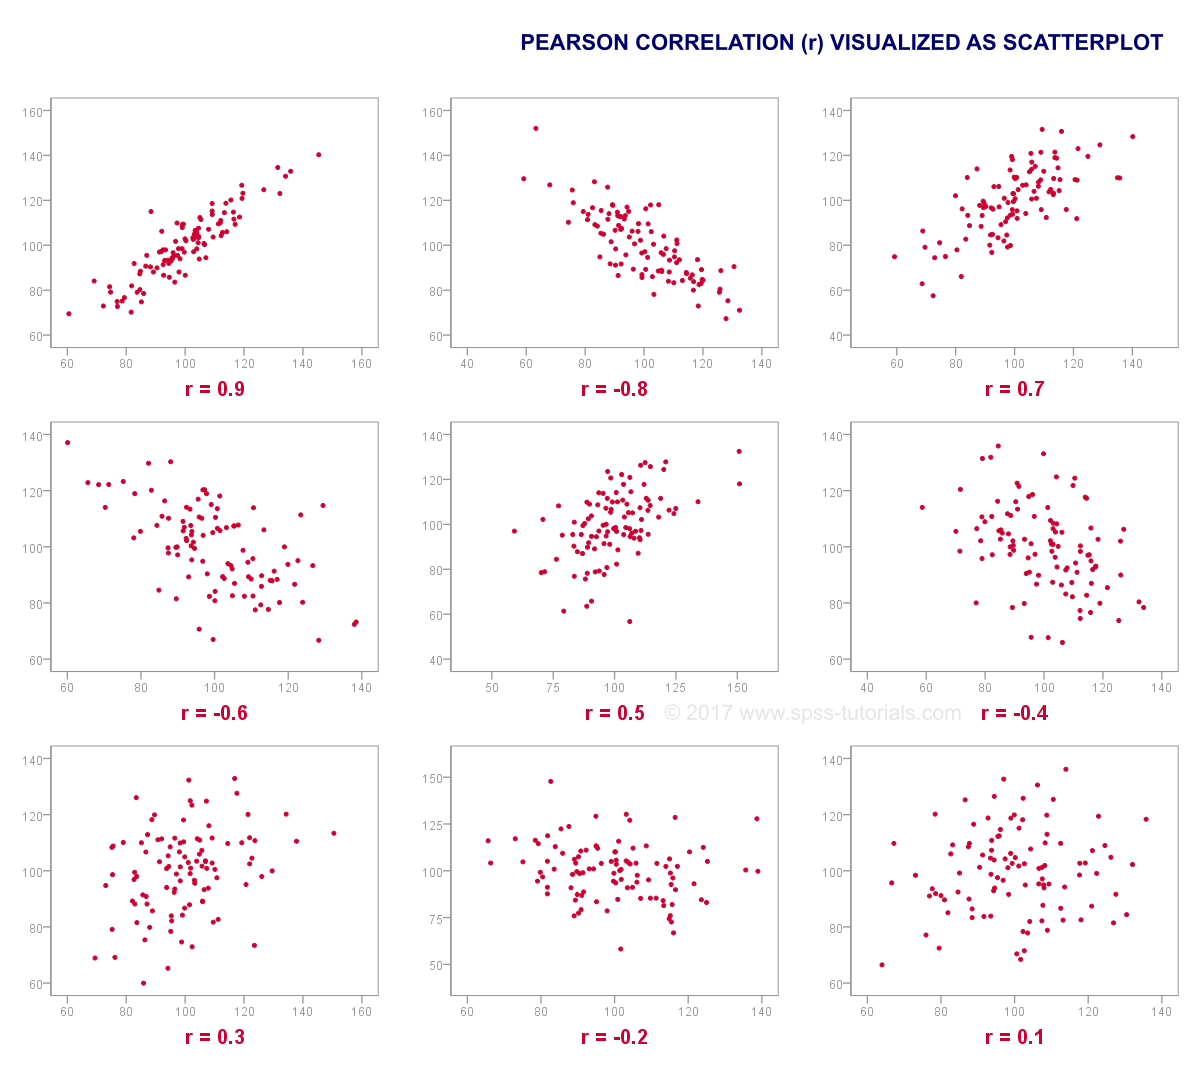

### Causation

You've probably heard the phrase "correlation does not imply causation", which just means that two variables can be strongly correlated (a high Pearson `r` number) and yet have nothing to do with each other. For example, Internet Explorer market share is unlikely to affect the national murder rate.

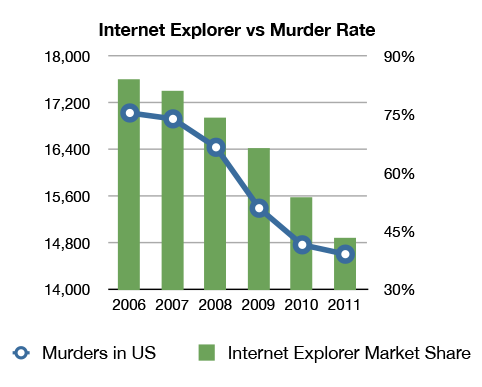

Both correlation graphics were found on ["Tes" Blendspace by user Alexryan18](https://www.tes.com/lessons/HHy9R50JoY0VNg/common-assessment-4-review). If you like these correlation/causation graphs, you might like [Tyler Vigen's website](https://tylervigen.com/page?page=1). Or, here's an XKCD comic:

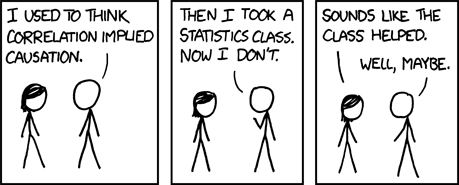

The formula for calculating the correlation coefficient $r$ is given by

$$r = \frac{\sum_{i=1}^n (x_i - \overline{x})(y_i - \overline{y})}{(n-1)S_x S_y}$$

where $\overline{x}$ and $\overline{y}$ are the means of variables $x$ and $y$, $S_x$ and $S_y$ are the standard deviations, and $n$ is the number of samples. We can write a python function to calculate the Pearson Correlation Coefficient for two sets of values.

In [23]:
def correlation(xList, yList):

    if len(xList) != len(yList):
        print("Error: there are", len(xList), "x-values and", len(yList), "y-values")
        return 0
        
    import statistics
    xBar = statistics.mean(xList)
    yBar = statistics.mean(yList)
    xStd = statistics.stdev(xList)
    yStd = statistics.stdev(yList)
    total = 0.0
    for i in range(len(xList)):
        total = total + (xList[i] - xBar) * (yList[i] - yBar)
    value = total / ((len(xList) - 1) * xStd * yStd)
    return value

In [24]:
mags = get_csv_column("earthquakes.csv", "mag")
mags[:5]

[0.75, 2.52, 0.56, 1.7, 1.37]

In [25]:
depths = get_csv_column("earthquakes.csv", "depth")
depths[:5]

[6.61, 5.0, 2.27, 88.1, 16.01]

In [26]:
r = correlation(mags, depths)
r

Error: there are 15521 x-values and 15524 y-values


0

In [27]:
def get_csv_column(csv_file, column_name):

    if column_name not in get_csv_columns(csv_file):
        return None
    
    dataset = []
    col_num = find_csv_column(csv_file, column_name)
    with open(csv_file, "r") as csv_object:
        csv_reader = csv.reader(csv_object)
        titles = next(csv_reader)
        dataset = [float(line[col_num]) if is_float(line[col_num]) else 0.0 for line in csv_reader]
        
    return dataset

In [28]:
import matplotlib.pyplot as plt

# create the plot
fig = plt.figure(figsize=(15,10))

# add a label to the plot (correlation = xxxx)
text = "correlation = {0:.5f}".format(correlation(mags, depths))
plt.text(-1.4, 600, text, size=18, color='r')

# plot the data points
plt.scatter(mags, depths, color='b')
plt.xlabel('Magnitudes', size=18)
plt.ylabel('Depths', size=18)
plt.title('USGS Earthquake Data: Correlation of Magnitude vs Depth', size=20)
plt.show()

Error: there are 15521 x-values and 15524 y-values


ValueError: x and y must be the same size

ValueError: Image size of 2031x326205 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1080x720 with 1 Axes>